# Exploring Data - Cleaning and Visualizing

## Project Overview

This project analyzes global box office data to project what movie attributes produce the greatest probability of higher viewership and ROI. Our analysis explores financial data, user ratings, and viewership data to help decide what movies to create.

## Notebook Overview

This notebooke explores some of the provided IMDB datasets and forms key insights from the provided data. I will also identify gaps in the provided data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing files into dataframes
movie_actors_df = pd.read_csv('data/IMDB/name.basics.csv')
global_movie_title_df = pd.read_csv('data/IMDB/title.akas.csv')#, sep='\t', index_col=0)
movie_title_basics_df = pd.read_csv('data/IMDB/title.basics.csv')
movie_title_crew_df = pd.read_csv('data/IMDB/title.crew.csv')
movie_title_principals_df = pd.read_csv('data/IMDB/title.principals.csv')
movie_ratings_df = pd.read_csv('data/IMDB/title.ratings.csv')
movie_gross_df = pd.read_csv('data/bom.movie_gross.csv')

# Movie Gross

The firs dataset comes from [Box Office Mojo](https://www.boxofficemojo.com/). 

In [4]:
# Inspecting the first five of the dataframe
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#Inspect metadata
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
# seeing how many years are covered by the dataset
movie_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [7]:
#Fill null values in the studio column with 'Other'
movie_gross_df['studio'].fillna(value='Other', inplace=True)

In [8]:
#Inspect data where domestic_gross is null
movie_gross_df.loc[movie_gross_df['domestic_gross'].isna() == True]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,Other,NaN,4000000,2012


Because we're trying to find out which movies produced in Hollywood do the best globally, we need to drop movies not produced domestically. 

In [9]:
movie_gross_df.dropna(subset=['domestic_gross'], inplace=True)

In [10]:
movie_gross_df.loc[movie_gross_df['foreign_gross'].isna() == True]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Because we're trying to find out which movies produced in Hollywood do the best globally, we need to drop any movies that haven't reached the global box office. 

In [11]:
movie_gross_df.dropna(subset=['foreign_gross'], inplace=True)

In [12]:
print(movie_gross_df['domestic_gross'] == pd.to_numeric(movie_gross_df['domestic_gross']))

0       True
1       True
2       True
3       True
4       True
        ... 
3275    True
3286    True
3309    True
3342    True
3353    True
Name: domestic_gross, Length: 2009, dtype: bool


In [13]:
movie_gross_df['domestic_gross'] = pd.to_numeric(movie_gross_df['domestic_gross'])

In [14]:
movie_gross_df['foreign_gross']=movie_gross_df['foreign_gross'].str.replace(',','')

In [15]:
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'])

In the below data frame we'll add both the foreign gross to the domestic gross to get the total gross.

In [16]:
total = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']
movie_gross_df['total_gross'] = total
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In the below dataframe we'll sort the total gross by highest to lowest.

In [17]:
highest_gross_df = movie_gross_df.sort_values(["total_gross"], ascending=False)
highest_gross_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...,...
711,I'm Glad My Mother is Alive,Strand,8700.0,13200.0,2011,2.190000e+04
322,The Thorn in the Heart,Osci.,7400.0,10500.0,2010,1.790000e+04
1110,Cirkus Columbia,Strand,3500.0,9500.0,2012,1.300000e+04
715,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04


In order to use this data, we'll need to merge with our master CSV file, 'title.basics.csv'

In [18]:
movie_title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [19]:
ps_df = movie_title_basics_df[(movie_title_basics_df["primary_title"] ==  movie_title_basics_df["original_title"])  ]

In [20]:
ps2_df = movie_title_basics_df[(movie_title_basics_df["primary_title"] !=  movie_title_basics_df["original_title"])  ]

In [21]:
ps3_df = movie_title_basics_df[(movie_title_basics_df["primary_title"] !=  movie_title_basics_df["original_title"])  ]

In [22]:
ps_df['title'] = ps_df['primary_title']

<ipython-input-22-36815a166e6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps_df['title'] = ps_df['primary_title']


In [23]:
ps_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,A Thin Life
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Kuambil Lagi Hatiku
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dankyavar Danka
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,6 Gunn


In [24]:
ps2_df['title'] = ps2_df['primary_title']

<ipython-input-24-6ecdcdefff0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps2_df['title'] = ps2_df['primary_title']


In [25]:
ps3_df['title'] = ps3_df['original_title']

<ipython-input-25-898cf0a5569d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps3_df['title'] = ps3_df['original_title']


In [26]:
pdList = [ps_df, ps2_df, ps3_df]  # List of your dataframes
new_ps_df = pd.concat(pdList)

In [27]:
new_ps_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,A Thin Life
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot
...,...,...,...,...,...,...,...
146026,tt9899938,Journey of the Sky Goddess,Kibaiyanse! Watashi,2019,116.0,"Comedy,Drama",Kibaiyanse! Watashi
146028,tt9900060,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,2019,NaN,"Adventure,Crime,Drama",Lupin the IIIrd: Mine Fujiko no Uso
146037,tt9900688,Big Three Dragons,Da San Yuan,2019,111.0,Comedy,Da San Yuan
146121,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary,Kirsebæreventyret


In [28]:
highest_gross_ps_df = highest_gross_df.merge(new_ps_df, on = 'title')
highest_gross_ps_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
1,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"
2,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"
4,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport"
...,...,...,...,...,...,...,...,...,...,...,...,...
2040,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8095720,Aurora,Aurora,2017,68.0,"Biography,Documentary,Drama"
2041,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8396182,Aurora,Aurora,2018,98.0,Drama
2042,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8553606,Aurora,Aurora,2019,106.0,"Comedy,Drama,Romance"
2043,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8821182,Aurora,Aurora,2018,110.0,"Horror,Thriller"


# Movie Actors and Actresses

In [29]:
movie_principals_df = pd.merge(movie_title_principals_df, movie_actors_df, how ='left', left_on='nconst', right_on='nconst')
movie_principals_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack","tt0095294,tt0375912,tt0063385,tt0985699"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,"tt9676034,tt5498354,tt0436992,tt8972256"
1028183,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


In [30]:
movie_actors_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


Now we'll separate

In [31]:
movie_actors_df.assign(known_for_titles=movie_actors_df.known_for_titles.str.split(",")).explode("known_for_titles")

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",tt0837562
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",tt2398241
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",tt0844471
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer",tt0118553
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department",tt0896534
...,...,...,...,...,...,...
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,tt8737130
606645,nm9991320,Madeline Smith,NaN,NaN,actress,tt8734436
606645,nm9991320,Madeline Smith,NaN,NaN,actress,tt9615610
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [32]:
highest_gross_ps_actor_df = pd.merge(highest_gross_ps_df, movie_actors_df, how ='left', left_on='tconst', right_on='known_for_titles')
highest_gross_ps_actor_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN,NaN,NaN
1,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",NaN,NaN,NaN,NaN,NaN,NaN
4,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8396182,Aurora,Aurora,2018,98.0,Drama,nm9837414,Mirlan Satkymbaev,NaN,NaN,cinematographer,tt8396182
2389,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8553606,Aurora,Aurora,2019,106.0,"Comedy,Drama,Romance",NaN,NaN,NaN,NaN,NaN,NaN
2390,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8821182,Aurora,Aurora,2018,110.0,"Horror,Thriller",nm10073626,Federico Fernandez,NaN,NaN,producer,tt8821182
2391,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8821182,Aurora,Aurora,2018,110.0,"Horror,Thriller",nm10073629,Gary Barrozo,NaN,NaN,producer,tt8821182


In [33]:
actors_df = movie_principals_df[(movie_principals_df["category"] == "actor")]
actors_named_df = movie_actors_df

In [34]:
actress_df = movie_principals_df[(movie_principals_df["category"] == "actress")]
actress_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383"
15,tt0417610,2,nm0330974,actress,NaN,"[""Diana""]",Esther Goris,1963.0,NaN,"actress,writer,director","tt1563675,tt0220270,tt0116238,tt0094046"
17,tt0417610,4,nm0679167,actress,NaN,"[""Adriana María""]",Florencia Peña,1974.0,NaN,"actress,writer,producer","tt0451493,tt0396351,tt2008324,tt3630580"
24,tt0469152,1,nm0036109,actress,NaN,"[""Eleanor Jordan""]",Lucie Arnaz,1951.0,NaN,"actress,soundtrack,producer","tt0073897,tt0080948,tt0062570,tt0469152"
...,...,...,...,...,...,...,...,...,...,...,...
1028142,tt9672244,1,nm0260884,actress,NaN,"[""Marie""]",Núria Espert,1935.0,NaN,"actress,miscellaneous,director","tt0115462,tt0093436,tt0452244,tt0996918"
1028145,tt9672244,4,nm0508708,actress,NaN,NaN,Carmen Liaño,NaN,NaN,actress,"tt0039442,tt0088870,tt0090259,tt0092982"
1028161,tt9679036,1,nm9742452,actress,NaN,"[""Yuna Takahashi""]",Sherman Tsang,NaN,NaN,actress,"tt8772556,tt9679036,tt6143796,tt8047864"
1028163,tt9679036,3,nm7751067,actress,NaN,"[""Penelope (Penny) Fitzherbert""]",Jacqueline Godbout,NaN,NaN,"actress,director,writer","tt8521054,tt9679036,tt8141472"


In [44]:
highest_gross_ps_actor_df = pd.merge(highest_gross_ps_df, actors_df, how ='left', left_on='tconst', right_on='tconst')
highest_gross_ps_actor_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,...,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,1.0,nm0000375,actor,NaN,"[""Tony Stark"",""Iron Man""]",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,2.0,nm0262635,actor,NaN,"[""Steve Rogers"",""Captain America""]",Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820"
2,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,3.0,nm0749263,actor,NaN,"[""Bruce Banner"",""Hulk""]",Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926"
3,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,4.0,nm1165110,actor,NaN,"[""Thor""]",Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898"
4,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,1.0,nm1569276,actor,NaN,"[""T'Challa"",""Black Panther""]",Chadwick Boseman,1977.0,NaN,"actor,producer,writer","tt3498820,tt1825683,tt0453562,tt4154756"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4954,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8821182,Aurora,Aurora,2018,...,2.0,nm0667074,actor,NaN,"[""Eddie""]",Allan Paule,NaN,NaN,actor,"tt0099717,tt2590162,tt4838342,tt1160023"
4955,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8821182,Aurora,Aurora,2018,...,4.0,nm4912288,actor,NaN,"[""Ricky""]",Marco Gumabao,NaN,NaN,actor,"tt9759754,tt9653184,tt3837166,tt3772640"
4956,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt2208216,Vanishing Waves,Aurora,2012,...,1.0,nm1815886,actor,NaN,"[""Lukas""]",Marius Jampolskis,1978.0,NaN,actor,"tt2208216,tt4841390,tt4797448,tt1245721"
4957,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt2208216,Vanishing Waves,Aurora,2012,...,3.0,nm5104879,actor,NaN,"[""Jonas""]",Rudolfas Jansonas,NaN,NaN,actor,tt2208216


Now we'll sort through the top 50 highest grossing films 

In [36]:
top_fifty_df = highest_gross_ps_df.head(50)

In [404]:
top_fifty_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
1,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"
2,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"
4,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport"
5,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy"
6,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1611845,Frozen,Wai nei chung ching,2010,92.0,"Fantasy,Romance"
7,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation"
8,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi"
9,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy"


In [45]:
highest_gross_ps_actress_df = pd.merge(highest_gross_ps_df, actress_df, how ='left', left_on='tconst', right_on='tconst')
highest_gross_ps_actress_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,...,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,3.0,nm2143282,actress,NaN,"[""Nakia""]",Lupita Nyong'o,1983.0,NaN,"actress,producer,miscellaneous","tt2024544,tt2488496,tt1825683,tt3040964"
2,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,4.0,nm1775091,actress,NaN,"[""Okoye""]",Danai Gurira,1978.0,NaN,actress,"tt4154796,tt1825683,tt4154756,tt0857191"
3,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,...,1.0,nm5397459,actress,NaN,"[""Rey""]",Daisy Ridley,1992.0,NaN,"actress,producer,soundtrack","tt2488496,tt3402236,tt2076822,tt2527336"
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,...,4.0,nm0000402,actress,NaN,"[""Leia Organa""]",Carrie Fisher,1956.0,2016.0,"actress,soundtrack,writer","tt0076759,tt0086190,tt0080684,tt2527336"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8553606,Aurora,Aurora,2019,...,1.0,nm4241408,actress,NaN,"[""Aurora""]",Mimosa Willamo,NaN,NaN,"actress,soundtrack","tt3743042,tt3526098,tt8216084,tt6616260"
3235,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8553606,Aurora,Aurora,2019,...,3.0,nm5116716,actress,NaN,"[""Kinky""]",Oona Airola,1988.0,NaN,"actress,composer,music_department","tt7867522,tt4771932,tt4565668,tt7220640"
3236,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8821182,Aurora,Aurora,2018,...,1.0,nm1034352,actress,NaN,"[""Leana""]",Anne Curtis,1985.0,NaN,"actress,soundtrack","tt2057445,tt2420176,tt1413068,tt1305656"
3237,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8821182,Aurora,Aurora,2018,...,3.0,nm2995617,actress,NaN,NaN,Mercedes Cabral,1986.0,NaN,"actress,composer","tt1732648,tt4729492,tt3031000,tt0762073"


Merging the names of the highest grossing actors into the dataframe

In [47]:
rainmakers_df = pd.merge( top_fifty_df,  highest_gross_ps_actor_df, left_on='tconst', right_on='tconst')
rainmakers_df

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,total_gross_x,tconst,primary_title_x,original_title_x,start_year_x,...,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,1.0,nm0000375,actor,NaN,"[""Tony Stark"",""Iron Man""]",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,2.0,nm0262635,actor,NaN,"[""Steve Rogers"",""Captain America""]",Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820"
2,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,3.0,nm0749263,actor,NaN,"[""Bruce Banner"",""Hulk""]",Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926"
3,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,4.0,nm1165110,actor,NaN,"[""Thor""]",Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898"
4,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,1.0,nm1569276,actor,NaN,"[""T'Challa"",""Black Panther""]",Chadwick Boseman,1977.0,NaN,"actor,producer,writer","tt3498820,tt1825683,tt0453562,tt4154756"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt0451279,Wonder Woman,Wonder Woman,2017,...,2.0,nm1517976,actor,NaN,"[""Steve Trevor""]",Chris Pine,1980.0,NaN,"actor,producer,soundtrack","tt1408101,tt0451279,tt2660888,tt0796366"
125,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4028068,Wonder Woman,Wonder Woman,2014,...,2.0,nm3715454,actor,NaN,"[""Big Boss 1""]",Donald H. Steward,NaN,NaN,"actor,composer,producer","tt4322728,tt3056562,tt3534598,tt2195570"
126,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4028068,Wonder Woman,Wonder Woman,2014,...,4.0,nm6556216,actor,NaN,"[""Goon 2""]",Woody Wilson Hall,NaN,NaN,"actor,sound_department","tt5760674,tt5826552,tt4209044,tt4478168"
127,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4283448,Wonder Woman,Wonder Woman,2016,...,1.0,nm4276366,actor,NaN,"[""Irate Civil Servant""]",Alan Mathis,NaN,NaN,actor,"tt3036740,tt2931148,tt3220574,tt3703750"


In [48]:
top_fifty_a_df = highest_gross_ps_df.head(50)

In [49]:
top_fifty_a_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
1,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"
2,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"
4,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport"
5,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy"
6,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1611845,Frozen,Wai nei chung ching,2010,92.0,"Fantasy,Romance"
7,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation"
8,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi"
9,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy"


In [50]:
rainmakers_df = pd.merge( top_fifty_a_df,  highest_gross_ps_actor_df, left_on='tconst', right_on='tconst')
rainmakers_df

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,total_gross_x,tconst,primary_title_x,original_title_x,start_year_x,...,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,1.0,nm0000375,actor,NaN,"[""Tony Stark"",""Iron Man""]",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,2.0,nm0262635,actor,NaN,"[""Steve Rogers"",""Captain America""]",Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820"
2,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,3.0,nm0749263,actor,NaN,"[""Bruce Banner"",""Hulk""]",Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926"
3,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,4.0,nm1165110,actor,NaN,"[""Thor""]",Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898"
4,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,1.0,nm1569276,actor,NaN,"[""T'Challa"",""Black Panther""]",Chadwick Boseman,1977.0,NaN,"actor,producer,writer","tt3498820,tt1825683,tt0453562,tt4154756"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt0451279,Wonder Woman,Wonder Woman,2017,...,2.0,nm1517976,actor,NaN,"[""Steve Trevor""]",Chris Pine,1980.0,NaN,"actor,producer,soundtrack","tt1408101,tt0451279,tt2660888,tt0796366"
125,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4028068,Wonder Woman,Wonder Woman,2014,...,2.0,nm3715454,actor,NaN,"[""Big Boss 1""]",Donald H. Steward,NaN,NaN,"actor,composer,producer","tt4322728,tt3056562,tt3534598,tt2195570"
126,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4028068,Wonder Woman,Wonder Woman,2014,...,4.0,nm6556216,actor,NaN,"[""Goon 2""]",Woody Wilson Hall,NaN,NaN,"actor,sound_department","tt5760674,tt5826552,tt4209044,tt4478168"
127,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4283448,Wonder Woman,Wonder Woman,2016,...,1.0,nm4276366,actor,NaN,"[""Irate Civil Servant""]",Alan Mathis,NaN,NaN,actor,"tt3036740,tt2931148,tt3220574,tt3703750"


In [51]:
rainmakers_w_df = pd.merge( top_fifty_df,  highest_gross_ps_actress_df, left_on='tconst', right_on='tconst')
rainmakers_w_df

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,total_gross_x,tconst,primary_title_x,original_title_x,start_year_x,...,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,3.0,nm2143282,actress,NaN,"[""Nakia""]",Lupita Nyong'o,1983.0,NaN,"actress,producer,miscellaneous","tt2024544,tt2488496,tt1825683,tt3040964"
2,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,4.0,nm1775091,actress,NaN,"[""Okoye""]",Danai Gurira,1978.0,NaN,actress,"tt4154796,tt1825683,tt4154756,tt0857191"
3,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,...,1.0,nm5397459,actress,NaN,"[""Rey""]",Daisy Ridley,1992.0,NaN,"actress,producer,soundtrack","tt2488496,tt3402236,tt2076822,tt2527336"
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,...,4.0,nm0000402,actress,NaN,"[""Leia Organa""]",Carrie Fisher,1956.0,2016.0,"actress,soundtrack,writer","tt0076759,tt0086190,tt0080684,tt2527336"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt0451279,Wonder Woman,Wonder Woman,2017,...,4.0,nm0205063,actress,NaN,"[""Etta""]",Lucy Davis,1973.0,NaN,"actress,producer,writer","tt0365748,tt0290978,tt0455499,tt0451279"
62,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4028068,Wonder Woman,Wonder Woman,2014,...,1.0,nm4197194,actress,NaN,"[""Wonder Woman"",""Diana Prince""]",Veronica Pierce,NaN,NaN,"actress,producer,writer","tt4322728,tt4103860,tt4035590,tt4028068"
63,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4028068,Wonder Woman,Wonder Woman,2014,...,3.0,nm6780063,actress,NaN,"[""Dr. Barbara Minerva"",""Cheetah""]",Brenda Li Garcia,NaN,NaN,actress,"tt4322728,tt4340680,tt4028068,tt3337194"
64,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4283448,Wonder Woman,Wonder Woman,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
top_fifty_df = highest_gross_ps_df.head(50)

In [53]:
top_fifty_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
1,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"
2,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"
4,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport"
5,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy"
6,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1611845,Frozen,Wai nei chung ching,2010,92.0,"Fantasy,Romance"
7,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation"
8,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi"
9,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy"


In [54]:
highest_gross_name_df = pd.merge( highest_gross_ps_actress_df,  movie_actors_df, left_on='nconst', right_on='nconst')
highest_gross_name_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,...,primary_name_x,birth_year_x,death_year_x,primary_profession_x,known_for_titles_x,primary_name_y,birth_year_y,death_year_y,primary_profession_y,known_for_titles_y
0,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,Lupita Nyong'o,1983.0,NaN,"actress,producer,miscellaneous","tt2024544,tt2488496,tt1825683,tt3040964",Lupita Nyong'o,1983.0,NaN,"actress,producer,miscellaneous","tt2024544,tt2488496,tt1825683,tt3040964"
1,Queen of Katwe,BV,8900000.0,1500000.0,2016,1.040000e+07,tt4341582,Queen of Katwe,Queen of Katwe,2016,...,Lupita Nyong'o,1983.0,NaN,"actress,producer,miscellaneous","tt2024544,tt2488496,tt1825683,tt3040964",Lupita Nyong'o,1983.0,NaN,"actress,producer,miscellaneous","tt2024544,tt2488496,tt1825683,tt3040964"
2,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,Danai Gurira,1978.0,NaN,actress,"tt4154796,tt1825683,tt4154756,tt0857191",Danai Gurira,1978.0,NaN,actress,"tt4154796,tt1825683,tt4154756,tt0857191"
3,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,...,Daisy Ridley,1992.0,NaN,"actress,producer,soundtrack","tt2488496,tt3402236,tt2076822,tt2527336",Daisy Ridley,1992.0,NaN,"actress,producer,soundtrack","tt2488496,tt3402236,tt2076822,tt2527336"
4,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,...,Carrie Fisher,1956.0,2016.0,"actress,soundtrack,writer","tt0076759,tt0086190,tt0080684,tt2527336",Carrie Fisher,1956.0,2016.0,"actress,soundtrack,writer","tt0076759,tt0086190,tt0080684,tt2527336"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8396182,Aurora,Aurora,2018,...,Albina Imasheva,NaN,NaN,actress,"tt0166503,tt5351814,tt1043565,tt8396182",Albina Imasheva,NaN,NaN,actress,"tt0166503,tt5351814,tt1043565,tt8396182"
2830,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8553606,Aurora,Aurora,2019,...,Mimosa Willamo,NaN,NaN,"actress,soundtrack","tt3743042,tt3526098,tt8216084,tt6616260",Mimosa Willamo,NaN,NaN,"actress,soundtrack","tt3743042,tt3526098,tt8216084,tt6616260"
2831,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8553606,Aurora,Aurora,2019,...,Oona Airola,1988.0,NaN,"actress,composer,music_department","tt7867522,tt4771932,tt4565668,tt7220640",Oona Airola,1988.0,NaN,"actress,composer,music_department","tt7867522,tt4771932,tt4565668,tt7220640"
2832,Aurora,CGld,5700.0,5100.0,2011,1.080000e+04,tt8821182,Aurora,Aurora,2018,...,Anne Curtis,1985.0,NaN,"actress,soundtrack","tt2057445,tt2420176,tt1413068,tt1305656",Anne Curtis,1985.0,NaN,"actress,soundtrack","tt2057445,tt2420176,tt1413068,tt1305656"


In [57]:
highest_gross_name_1_df = pd.merge( rainmakers_df,  movie_actors_df, left_on='nconst', right_on='nconst')
highest_gross_name_1_df.head(50)

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,total_gross_x,tconst,primary_title_x,original_title_x,start_year_x,...,primary_name_x,birth_year_x,death_year_x,primary_profession_x,known_for_titles_x,primary_name_y,birth_year_y,death_year_y,primary_profession_y,known_for_titles_y
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
1,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09,tt1300854,Iron Man 3,Iron Man Three,2013,...,Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
2,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09,tt3498820,Captain America: Civil War,Captain America: Civil War,2016,...,Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
3,Spider-Man: Homecoming,Sony,334200000.0,546000000.0,2017,8.802000e+08,tt2250912,Spider-Man: Homecoming,Spider-Man: Homecoming,2017,...,Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
4,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820",Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820"
5,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09,tt3498820,Captain America: Civil War,Captain America: Civil War,2016,...,Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820",Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820"
6,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926",Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926"
7,Thor: Ragnarok,BV,315100000.0,538900000.0,2017,8.540000e+08,tt3501632,Thor: Ragnarok,Thor: Ragnarok,2017,...,Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926",Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926"
8,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898",Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898"
9,Thor: Ragnarok,BV,315100000.0,538900000.0,2017,8.540000e+08,tt3501632,Thor: Ragnarok,Thor: Ragnarok,2017,...,Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898",Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898"


In this dataset above... we see something unfortunate. There are no lead female actors in the highest paid/highest popularity movies. So moving forward, we won't be able to include them in our graphs.

In [56]:
highest_gross_name_1_df.to_csv (r'C:\Users\Jonathan\Documents\Flatiron\dsc-data-science-env-config\project_1\highest_gross_name_1_df.csv', index = False, header=True)

Now we get to sor the highest paid actors in decending order

In [416]:
sorted_highest_actor_df = highest_actor_df.sort_values(["title"], ascending=False)
sorted_highest_actor_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,...,genres,ordering,nconst,category,job,characters,birth_year,death_year,primary_profession,known_for_titles
primary_name,,,,,,,,,,,,,,,,,,,,,
Mark Wahlberg,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,0,17,17,0,17,17
Owen Wilson,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,0,16,16,0,16,16
Liam Neeson,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,0,16,16,0,16,16
Michael Fassbender,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,0,16,16,0,16,16
Bradley Cooper,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,0,15,15,0,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Johnathon Schaech,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1
John Woo,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1
John Vickery,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,0,1,1


Cleaning up the data to include only actor's name and number of movies

In [418]:
sorted_highest_actor_df = sorted_highest_actor_df.drop(columns=['original_title', 'runtime_minutes', ])

In [419]:
sorted_highest_actor_df = sorted_highest_actor_df.rename(columns={'title': '#_of_movies'})

In [420]:
sorted_highest_actor1_df = sorted_highest_actor_df[['#_of_movies']]
sorted_highest_actor1_df.head(50)

,#_of_movies
primary_name,
Mark Wahlberg,17
Owen Wilson,16
Liam Neeson,16
Michael Fassbender,16
Bradley Cooper,15
Steve Carell,15
Matthew McConaughey,14
Dwayne Johnson,14
Johnny Depp,13


Merging the data into the top grossing movies to show highest grossing actor as it relates to highest grossing movies

In [421]:
rainmakers_named_df = pd.merge( rainmakers_df,  sorted_highest_actor1_df, on='primary_name')
# rainmakers_named_df.info()

In [422]:
rainmakers_named_df = rainmakers_named_df[['title_x', 'year_x', 'total_gross_x', 'category', 'primary_name', '#_of_movies']]
top50_rainmakers = rainmakers_named_df.head(50)
top50_rainmakers

,title_x,year_x,total_gross_x,category,primary_name,#_of_movies
0,Avengers: Age of Ultron,2015,1.405400e+09,actor,Robert Downey Jr.,10
1,Iron Man 3,2013,1.214800e+09,actor,Robert Downey Jr.,10
2,Captain America: Civil War,2016,1.153300e+09,actor,Robert Downey Jr.,10
3,Spider-Man: Homecoming,2017,8.802000e+08,actor,Robert Downey Jr.,10
4,Avengers: Age of Ultron,2015,1.405400e+09,actor,Chris Evans,9
5,Captain America: Civil War,2016,1.153300e+09,actor,Chris Evans,9
6,Avengers: Age of Ultron,2015,1.405400e+09,actor,Mark Ruffalo,9
7,Thor: Ragnarok,2017,8.540000e+08,actor,Mark Ruffalo,9
8,Avengers: Age of Ultron,2015,1.405400e+09,actor,Chris Hemsworth,11
9,Thor: Ragnarok,2017,8.540000e+08,actor,Chris Hemsworth,11


In [423]:
top50_rainmakers = top50_rainmakers.rename(columns={'#_of_movies': 'num_of_movies'})
top50_rainmakers

,title_x,year_x,total_gross_x,category,primary_name,num_of_movies
0,Avengers: Age of Ultron,2015,1.405400e+09,actor,Robert Downey Jr.,10
1,Iron Man 3,2013,1.214800e+09,actor,Robert Downey Jr.,10
2,Captain America: Civil War,2016,1.153300e+09,actor,Robert Downey Jr.,10
3,Spider-Man: Homecoming,2017,8.802000e+08,actor,Robert Downey Jr.,10
4,Avengers: Age of Ultron,2015,1.405400e+09,actor,Chris Evans,9
5,Captain America: Civil War,2016,1.153300e+09,actor,Chris Evans,9
6,Avengers: Age of Ultron,2015,1.405400e+09,actor,Mark Ruffalo,9
7,Thor: Ragnarok,2017,8.540000e+08,actor,Mark Ruffalo,9
8,Avengers: Age of Ultron,2015,1.405400e+09,actor,Chris Hemsworth,11
9,Thor: Ragnarok,2017,8.540000e+08,actor,Chris Hemsworth,11


In [424]:
rainmakers_df

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,total_gross_x,tconst,primary_title_x,original_title_x,start_year_x,...,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,1.0,nm0000375,actor,NaN,"[""Tony Stark"",""Iron Man""]",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,2.0,nm0262635,actor,NaN,"[""Steve Rogers"",""Captain America""]",Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820"
2,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,3.0,nm0749263,actor,NaN,"[""Bruce Banner"",""Hulk""]",Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926"
3,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,4.0,nm1165110,actor,NaN,"[""Thor""]",Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898"
4,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,...,1.0,nm1569276,actor,NaN,"[""T'Challa"",""Black Panther""]",Chadwick Boseman,1977.0,NaN,"actor,producer,writer","tt3498820,tt1825683,tt0453562,tt4154756"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt0451279,Wonder Woman,Wonder Woman,2017,...,2.0,nm1517976,actor,NaN,"[""Steve Trevor""]",Chris Pine,1980.0,NaN,"actor,producer,soundtrack","tt1408101,tt0451279,tt2660888,tt0796366"
125,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4028068,Wonder Woman,Wonder Woman,2014,...,2.0,nm3715454,actor,NaN,"[""Big Boss 1""]",Donald H. Steward,NaN,NaN,"actor,composer,producer","tt4322728,tt3056562,tt3534598,tt2195570"
126,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4028068,Wonder Woman,Wonder Woman,2014,...,4.0,nm6556216,actor,NaN,"[""Goon 2""]",Woody Wilson Hall,NaN,NaN,"actor,sound_department","tt5760674,tt5826552,tt4209044,tt4478168"
127,Wonder Woman,WB,412600000.0,409300000.0,2017,8.219000e+08,tt4283448,Wonder Woman,Wonder Woman,2016,...,1.0,nm4276366,actor,NaN,"[""Irate Civil Servant""]",Alan Mathis,NaN,NaN,actor,"tt3036740,tt2931148,tt3220574,tt3703750"


In [425]:
top50_rainmakers

,title_x,year_x,total_gross_x,category,primary_name,num_of_movies
0,Avengers: Age of Ultron,2015,1.405400e+09,actor,Robert Downey Jr.,10
1,Iron Man 3,2013,1.214800e+09,actor,Robert Downey Jr.,10
2,Captain America: Civil War,2016,1.153300e+09,actor,Robert Downey Jr.,10
3,Spider-Man: Homecoming,2017,8.802000e+08,actor,Robert Downey Jr.,10
4,Avengers: Age of Ultron,2015,1.405400e+09,actor,Chris Evans,9
5,Captain America: Civil War,2016,1.153300e+09,actor,Chris Evans,9
6,Avengers: Age of Ultron,2015,1.405400e+09,actor,Mark Ruffalo,9
7,Thor: Ragnarok,2017,8.540000e+08,actor,Mark Ruffalo,9
8,Avengers: Age of Ultron,2015,1.405400e+09,actor,Chris Hemsworth,11
9,Thor: Ragnarok,2017,8.540000e+08,actor,Chris Hemsworth,11


## Charting the Data

Charted below on this bar graph, you can see the most popular actors as they correspond to the popularity of the movies from left to right. Robert Downey Jr. being in the most of the top 50 movies. What we also see is that there are no women who made the top 50 so we didn't include them in this graph. 

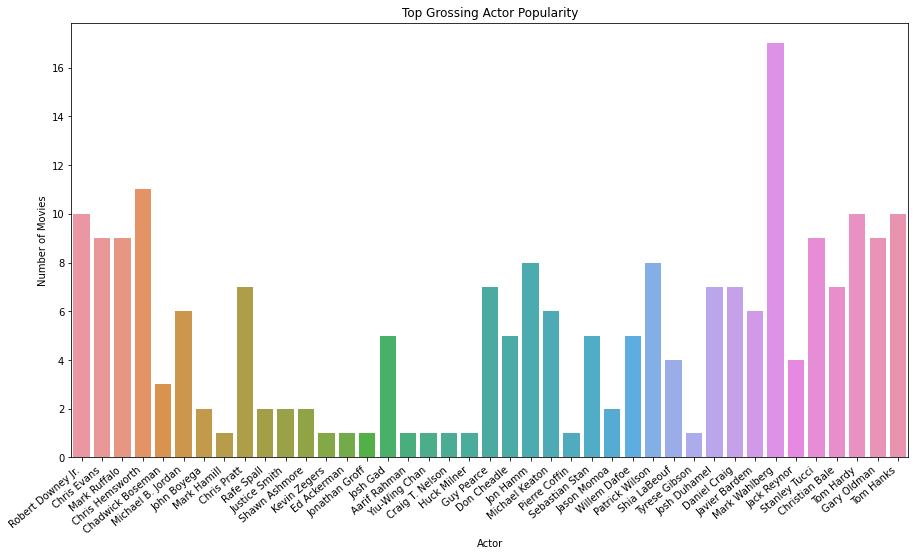

In [426]:
fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=top50_rainmakers, x='primary_name', y='num_of_movies')
ax.set(xlabel='Actor', ylabel='Number of Movies', title='Top Grossing Actor Popularity')
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [438]:
gross_actors = highest_dudes[['total_gross', 'primary_name']]
gross_actors

,total_gross,primary_name
0,1.405400e+09,Robert Downey Jr.
1,1.405400e+09,Chris Evans
2,1.405400e+09,Mark Ruffalo
3,1.405400e+09,Chris Hemsworth
4,1.347000e+09,Chadwick Boseman
...,...,...
4689,9.000000e+05,Willem Dafoe
4744,6.112000e+05,Patrick Wilson
4776,4.560000e+05,Jon Hamm
4865,2.320000e+05,Stanley Tucci


In [439]:
gross_actors = gross_actors.groupby('primary_name').sum()
gross_actors

,total_gross
primary_name,
Aarif Rahman,1.276400e+09
Chadwick Boseman,1.527120e+09
Chris Evans,4.512001e+09
Chris Hemsworth,4.841101e+09
Chris Pratt,3.835601e+09
Christian Bale,1.958600e+09
Craig T. Nelson,1.242800e+09
Daniel Craig,2.729500e+09
Don Cheadle,2.023550e+09


In [444]:
# gross_actors.sort_by('total_gross_x', ascending = False)
gross_actors = gross_actors.sort_values(["total_gross"], ascending=False)

In the graph below, we'll see which actors provide the greatest profitability to the movies they star in.  

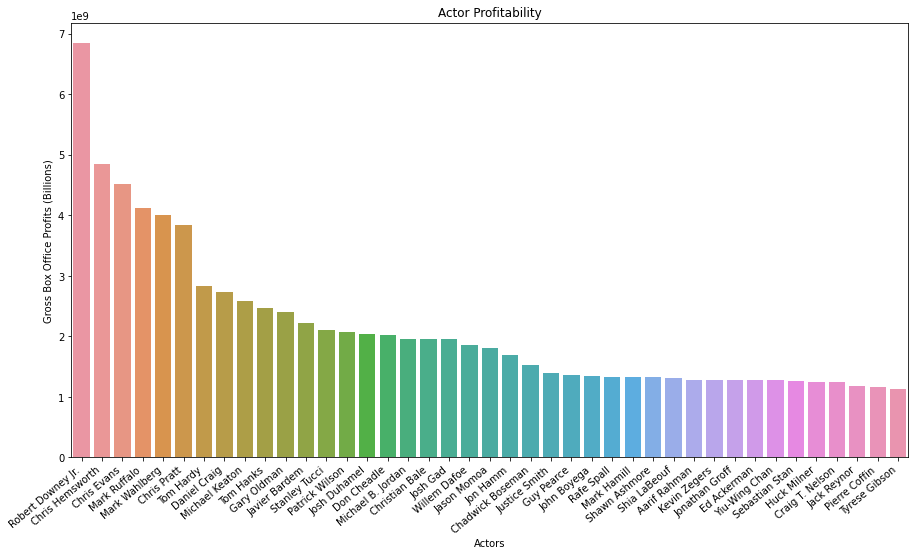

In [445]:
fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=gross_actors, x=gross_actors.index, y='total_gross')
ax.set(xlabel='Actors', ylabel='Gross Box Office Profits (Billions)', title='Actor Profitability')
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

As we can see, most of the movies with the highest paid actors are all Marvel movies in the years this data analyzes(2010-2018). What we might suggest here is a favorable trend in super hero movies. However, because all of these movies are by one studio, we dont' have sufficient enough data to confidently say this is a universal rule. More studies will need to be done in order to find if Marvel Studios has a monopoly on this genre. 

## Conclusion

We suggest Windows pay their female costars an equal wage as their male counterparts and create more female lead roles as this is certainly a gap in the industry. With the social climate trending more and more progressive, we can capitalize on this while other studios remain in an era that is becoming socially unsteady in this current climate. 

We can also suggest more research be done into the superhero genre to see if it is indeed a profit powerhouse, or if Marvel Studios already has a monopoly on it. 